<a href="https://colab.research.google.com/github/Sudheer417/Minor_Project/blob/master/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim of the project:**

Based on given input age and Estimated Salary, The model need to say whether the customer will purchase the product or not...

**Algorithm used for this project : K- Nearest Neighbors**

In [ ]:
# K-Nearest Neighbors (KNN)

In [ ]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Importing the dataset 
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
df['Purchased']

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
purchased_people = df['Purchased'].values 
unique,count = np.unique(purchased_people,return_counts = True)
print(unique)
print(count)

[0 1]
[257 143]


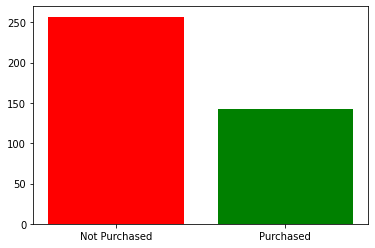

In [ ]:
label = ['Not Purchased','Purchased']
plt.bar(label,count,color = ['r','g'])
plt.show()

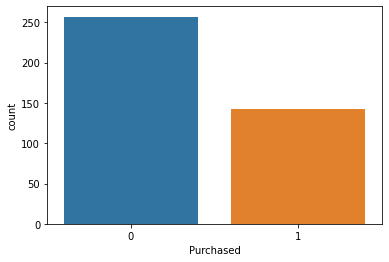

In [ ]:
#2nd method
sns.countplot(x = 'Purchased',data = df)
plt.show()

In [ ]:
df.shape

(400, 5)

In [ ]:
# Input and Output
x = df.iloc[:,2:4].values
y = df.iloc[:,4].values

In [ ]:
x.shape

(400, 2)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
x_train.shape

(300, 2)

In [ ]:
x_test.shape

(100, 2)

In [ ]:
# Perform Scaling.. Because there is a huge range difference between the inputs
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[0.61904762, 0.17777778],
       [0.33333333, 0.77777778],
       [0.47619048, 0.25925926],
       [0.33333333, 0.88888889],
       [0.80952381, 0.04444444],
       [0.83333333, 0.65925926],
       [0.5       , 0.2       ],
       [0.47619048, 0.34074074],
       [0.42857143, 0.25925926],
       [0.42857143, 0.35555556],
       [0.4047619 , 0.07407407],
       [0.4047619 , 0.25925926],
       [0.57142857, 0.42962963],
       [0.69047619, 0.25185185],
       [0.97619048, 0.1037037 ],
       [0.73809524, 0.37037037],
       [0.64285714, 0.85925926],
       [0.30952381, 0.54814815],
       [0.66666667, 0.4962963 ],
       [0.69047619, 0.26666667],
       [0.19047619, 0.        ],
       [1.        , 0.64444444],
       [0.47619048, 0.71851852],
       [0.52380952, 0.68148148],
       [0.57142857, 0.28148148],
       [0.4047619 , 0.32592593],
       [0.71428571, 0.19259259],
       [0.71428571, 0.88148148],
       [0.47619048, 0.72592593],
       [0.26190476, 0.98518519],
       [0.

In [ ]:
np.sqrt(x_train.shape[0])

17.320508075688775

In [ ]:
k=17

In [ ]:
# Fitting the knn classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
y_pred # Predicted Output

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
y_test # Real Output

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [ ]:
#Checking the Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

93.0

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 3, 29]])

In [ ]:
(64+29)/(64+4+3+29)*100

93.0

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [ ]:
# Checking with random data in the dataset
y1 = scaler.transform([[51,23000]])
y1 = model.predict(y1)
y1

array([1])